<div style="text-align: right"><sub>This notebook is distributed under the <a href="https://creativecommons.org/licenses/by-sa/3.0/" target="_blank">Attribution-ShareAlike 3.0 International (CC BY-SA 3.0) license</a>.</sub></div>
<h1>Curs d'Òptica en Python <span style="font-size:10px;"> <i>Jupyter notbooks collection by <a href="https://webgrec.ub.edu/webpages/000004/cat/dmaluenda.ub.edu.html" target="_blank">David Maluenda</a></i></span></h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a href="https://campusvirtual.ub.edu/my" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/ub_logo-01.png" width="130"/>
    </a>
  </td>
  <td>
     &#160 &#160 &#160 &#160 &#160
  </td>
  <td>   <!-- gColab -->
    <a href="https://colab.research.google.com/github/opticaUB/Material_Classe/blob/main/43_diffractionImaging.ipynb" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/colab_logo_32px.png" />
      Run in Google Colab
    </a>
  </td>
  <td>
     &#160 &#160 &#160 &#160 &#160
  </td>
  <td>   <!-- github -->
    <a href="https://github.com/opticaUB/material_Classe/blob/main/43_diffractionImaging.ipynb" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/github_logo_32px.png" />
      View source on GitHub
    </a>
  </td>
  <td>
      &#160 &#160 &#160 &#160 &#160
  </td>
  <td>   <!-- download -->
    <a href="https://raw.githubusercontent.com/opticaUB/material_Classe/refs/heads/main/43_diffractionImaging.ipynb"  target="_blank"
          download="02_Training">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/download_logo_32px.png" />
      Download notebook
      </a>
  </td>
</table>

# 4. Difracció d'obertures amb forma arbitraria

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from ipywidgets import interactive, interact_manual, interact, FloatSlider

from PIL import Image
import requests

fshift = np.fft.fftshift
ifshift = np.fft.ifftshift
fft = lambda im, pad, pad2: fshift(np.fft.fft2(ifshift(im), (pad, pad2)))
ifft = lambda im, pad, pad2: ifshift(np.fft.ifft2(fshift(im), (pad, pad2)))

Anem a analitzar les diferències entre els telescopis espacials Hubble i James Webb

https://webb.nasa.gov/content/about/comparisonWebbVsHubble.html

<img src="https://science.nasa.gov/wp-content/uploads/2023/05/jwst-v-hst-ttable-4k-woperson-tweek-jpg.webp?w=2560&format=webp">

In [2]:
url_webb = "https://github.com/opticaUB/Material_Classe/blob/main/resources/22t_3_difraccio_webbMirror.png?raw=true" # "resources/22t_3_difraccio_webbMirror.png"
webb_file = Image.open(requests.get(url_webb, stream=True).raw)
webb = np.array(webb_file.getdata()).reshape(webb_file.size[0], webb_file.size[1], 3)[:,:,0]
N = webb.shape

print(f"{N=}")

N_webb = 131.4 / 6.5  # focal-length/diameter 

N=(951, 951)


In [3]:
N_hubble = 57.6 / 2.4  # focal-length [m] / diameter [m] 
r_H = 400 * N_webb / N_hubble

x0 = np.linspace(-N[0]//2, N[0]//2, N[0])
y0 = np.linspace(-N[1]//2, N[1]//2, N[1])
x, y = np.meshgrid(x0, y0)

hubble = (x**2 + y**2 < r_H**2) * 1 
hubble -= (x**2 + y**2 < (0.2*r_H)**2) * 1

hubble[N[0]//2-4:N[0]//2+4, :] = 0
hubble[:, N[1]//2-4:N[1]//2+4] = 0


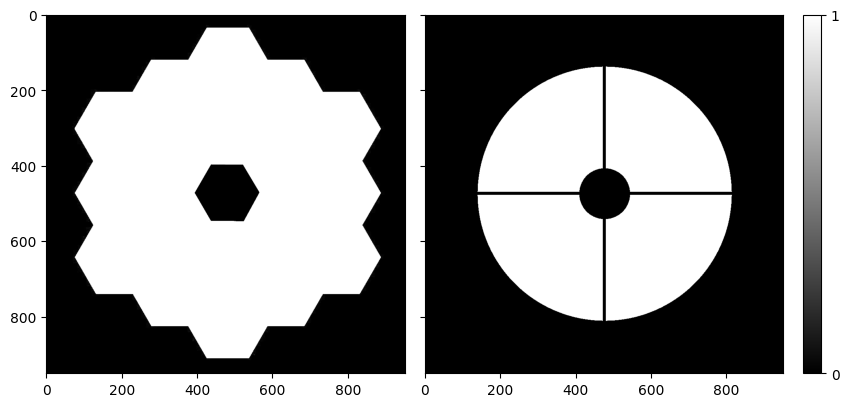

In [4]:
fig = plt.figure(figsize=(10, 20))
axs = ImageGrid(fig, 111,
                nrows_ncols=(1, 2),
                axes_pad=0.2,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="5%",
                cbar_pad=0.2
                )

im = axs[0].imshow(webb, cmap='gray')
im = axs[1].imshow(hubble, cmap='gray')

cbar = plt.colorbar(im, cax=axs.cbar_axes[0], ticks=[0, 1])

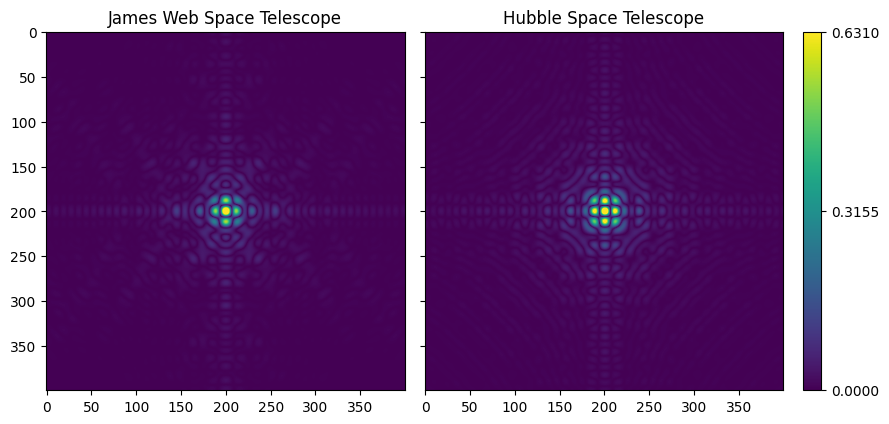

In [36]:
WEBB = np.abs(fft(webb, 8000, 8000))
WEBB /= WEBB.max()
trim = 3800
WEBB_subset = WEBB[trim:-trim, trim:-trim]

HUBBLE = np.abs(fft(hubble, 8000, 8000))
HUBBLE /= HUBBLE.max()
HUBBLE_subset = HUBBLE[trim:-trim, trim:-trim]

fig = plt.figure(figsize=(10, 5))
axs = ImageGrid(fig, 111,
                nrows_ncols=(1, 2),
                axes_pad=0.2,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="5%",
                cbar_pad=0.2
                )
maximum = 10**(-0.2)
im = axs[0].imshow(WEBB_subset, vmin=0, vmax=maximum)
im = axs[1].imshow(HUBBLE_subset, vmin=0, vmax=maximum)
axs[0].set_title('James Web Space Telescope')
axs[1].set_title('Hubble Space Telescope')
cbar = plt.colorbar(im, cax=axs.cbar_axes[0], ticks=[0, maximum/2, maximum])
plt.show()

In [40]:
WEBB = np.abs(fft(webb, 2000, 2000))
WEBB /= WEBB.max()
trim = 700
WEBB_subset = WEBB[trim:-trim, trim:-trim]

HUBBLE = np.abs(fft(hubble, 2000, 2000))
HUBBLE /= HUBBLE.max()
HUBBLE_subset = HUBBLE[trim:-trim, trim:-trim]

In [41]:
@interact
def plot(gain=FloatSlider(value=0, min=0., max=2.5, step=0.1, 
                          continuous_update=False)):
    fig = plt.figure(figsize=(10, 5))
    axs = ImageGrid(fig, 111,
                    nrows_ncols=(1, 2),
                    axes_pad=0.2,
                    cbar_location="right",
                    cbar_mode="single",
                    cbar_size="5%",
                    cbar_pad=0.2
                    )
    maximum = 10**(-gain)
    im = axs[0].imshow(WEBB_subset, vmin=0, vmax=maximum)
    im = axs[1].imshow(HUBBLE_subset, vmin=0, vmax=maximum)
    axs[0].set_title('James Web Space Telescope')
    axs[1].set_title('Hubble Space Telescope')
    cbar = plt.colorbar(im, cax=axs.cbar_axes[0], ticks=[0, maximum/2, maximum])
    plt.show()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='gain', max=2.5), Output()),…

In [42]:
url_bgnebula = "https://github.com/opticaUB/Material_Classe/blob/main/resources/22t_3_difraccio_background.png?raw=true" # "resources/22t_3_difraccio_background.png"
bgnebula_file = Image.open(requests.get(url_bgnebula, stream=True).raw)
background_nebula = np.array(bgnebula_file.getdata()).reshape(webb_file.size[0], webb_file.size[1])

stars = np.random.rand(*N)  #  plt.imread('background.png')  #  Background of far-far-away primitive universe
stars *= np.double(background_nebula/background_nebula.max())

N_stars = stars.shape

# Foreground of stars relatively close
stars[124, 254] = 1
stars[224, 364] = 2
stars[324, 234] = 4
stars[424, 434] = 8
stars[524, 284] = 16
stars[624, 284] = 32
stars[124, 484] = 64
stars[224, 534] = 128
stars[324, 584] = 128
stars[424, 484] = 64
stars[524, 384] = 32
stars[624, 484] = 8

STARS = fft(stars, *N)

stars_webb = np.abs(ifft(STARS*webb, *N_stars))
stars_hubble = np.abs(ifft(STARS*hubble, *N_stars))

stars_webb /= stars_webb.max()
stars_hubble /= stars_hubble.max()

In [44]:
@interact(gain=FloatSlider(min=0., max=2.5, step=0.1, continuous_update=False))
def plot(gain=0):
    fig = plt.figure(figsize=(16, 8))
    axs = ImageGrid(fig, 111,
                    nrows_ncols=(1, 2),
                    axes_pad=0.2,
                    cbar_location="right",
                    cbar_mode="single",
                    cbar_size="5%",
                    cbar_pad=0.2
                    )
    maximum = 10**(-gain)
    im = axs[0].imshow(stars_webb, vmin=0, vmax=maximum)
    im = axs[1].imshow(stars_hubble, vmin=0, vmax=maximum)
    axs[0].set_title('James Web Space Telescope')
    axs[1].set_title('Hubble Space Telescope')
    cbar = plt.colorbar(im, cax=axs.cbar_axes[0], ticks=[0, maximum/4, maximum/2, 3*maximum/4, maximum])
    plt.show()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='gain', max=2.5), Output()),…

Entreu a la plana web següent per vuere imatges reals, tant del telescopi Hubble com del James Webb

https://www.webbcompare.com/index.html

Background image:

<img src="https://github.com/opticaUB/Material_Classe/blob/main/resources/22t_3_difraccio_background.png?raw=true" width=300px>

<hr>

<img src="https://github.com/opticaUB/Material_Classe/blob/main/resources/DNA_xRayDifraction.jpg?raw=true" width=800px>
<img src="https://github.com/opticaUB/Material_Classe/blob/main/resources/DNA_xRayDifraction_interpretation.png?raw=true" width=650px>

-> 11:39 ; 14:45


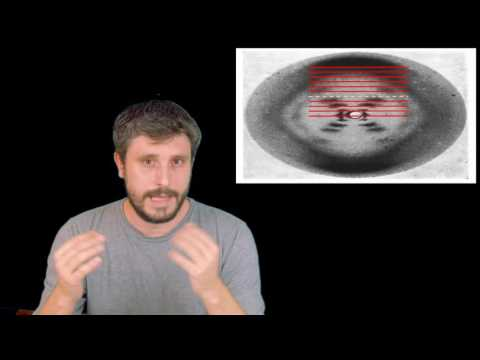

In [2]:
from IPython.display import YouTubeVideo
print("-> 11:39 ; 14:45")
YouTubeVideo('0qwihYUSodM', width=1000, height=560)

https://www.youtube.com/watch?v=0qwihYUSodM


<br>

<hr>

<img src="https://github.com/opticaUB/Material_Classe/blob/main/resources/reciprocalLattice.jpg?raw=true" width=800px>